In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys

os.chdir("/Users/Bacon/Documents/Current Courses/Hackathon/")


In [147]:
filename = "betterimg.jpg"

img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE).copy()


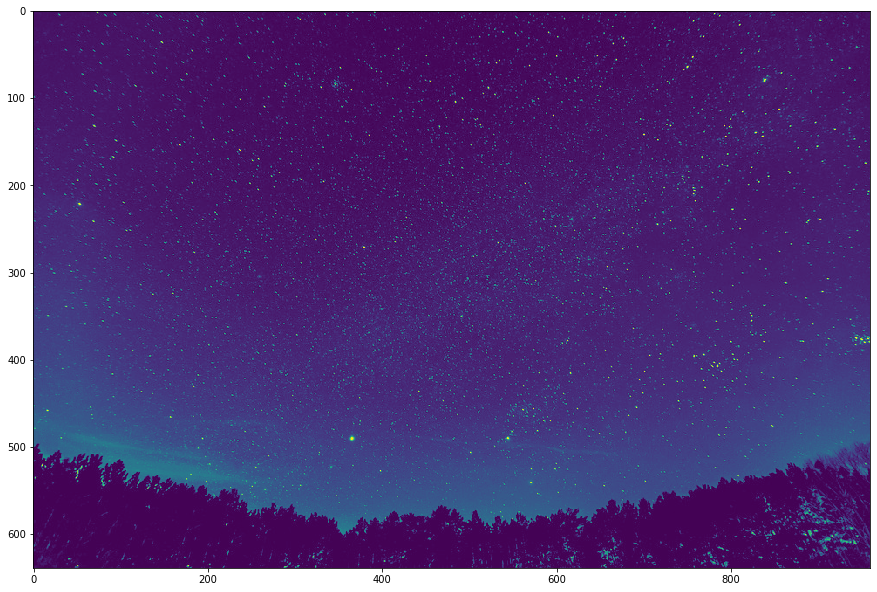

In [148]:

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)#, interpolation='nearest')

In [149]:
imageWidth = int(len(img[0]))
imageHeight = int(len(img))

thirdWidth = int(imageWidth / 3 )
thirdHeight = int(imageHeight / 3 )

print("thirdWidth", thirdWidth)
print("thirdHeight", thirdHeight)

thirdWidth 320
thirdHeight 213


In [150]:
count = 0
tiles = []

while count < 9 :
    tiles.append(np.zeros((thirdWidth+1, thirdHeight+1)))  
    count +=1
    
print(tiles)



[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0.

In [151]:
# Get the start array
activeArry = 0
row = 0
col = 0

# Array decision variables
nextArry = False
resetArry = False

# Start iteration
while row < imageHeight:
    while col < imageWidth:
        
        # Check to see if we need to advance the frame
        if nextArry:
            activeArry = +1
            nextArry = False
        elif resetArry:
            activeArry = -2
            resetArry = False
        # Assign the element to the (hopefully) correct tile
      #  print("\nrow/col", row, col)
      #  print("mod col", col % (thirdHeight))
      #  print("mod row", row % (thirdWidth))

        tiles[activeArry][ row % (thirdWidth), col % (thirdHeight)] = img[row, col]
        
        # Check if we need to update arry
        if col == thirdHeight or col == 2*thirdHeight:
            nextArry=True 
        elif col == thirdHeight and row == imageWidth:
            nextArry = True
        elif col == thirdHeight:
            resetArry = True
        
        col+=1
        
    # check if we need to update arry
    row+=1
    col=0    
    #print(activeArry)


In [183]:
tileCount = 0
tiles =[]

while tileCount < 9:
    leftBound = (tileCount % 3) * thirdWidth
    rightBound = (thirdWidth + (tileCount%3) * thirdWidth)
    
    topBound = (tileCount) * thirdHeight
    bottomBound = (thirdHeight + (tileCount) * thirdHeight)
    
    print("Bounds: ", leftBound, rightBound, topBound, bottomBound)
    
    # Get dem bun
    tiles.append(img[topBound:bottomBound,leftBound:rightBound])
    tileCount+=1

Bounds 0 320 0 213
Bounds 320 640 213 426
Bounds 640 960 426 639
Bounds 0 320 639 852
Bounds 320 640 852 1065
Bounds 640 960 1065 1278
Bounds 0 320 1278 1491
Bounds 320 640 1491 1704
Bounds 640 960 1704 1917


/Users/Bacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  """Entry point for launching an IPython kernel.


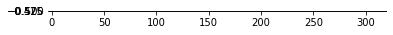

In [202]:
plt.imshow(tiles[4])